## COVID 19 Data Analysis Project

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

%matplotlib inline
import plotly
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

### Reading data from Johnhopkins Github repository

In [10]:
Confirmed_filepath = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
Death_filepath = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
Recovered_filepath = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [11]:
 def Import_COVIDData(filepath):
        data = filepath
        data = pd.read_csv(data)
        data.rename(columns={'Province/State':'Province','Country/Region':'Country'},inplace = True)
        return data      

In [15]:
def transform_COVIDData(data):
        data = pd.melt(
        frame = data,
        id_vars = ['Province','Country','Lat','Long','Status'],
        var_name = 'Date',
        value_name = 'Count'
    )
        return data

#### Confirmed Cases across globe

In [16]:
ConfirmedCases = Import_COVIDData(Confirmed_filepath)


In [17]:
ConfirmedCases.head()

,Province,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149


In [18]:
ConfirmedCases['Status'] = 'Confirmed'
ConfirmedCases = transform_COVIDData(ConfirmedCases)

In [19]:
ConfirmedCases

,Province,Country,Lat,Long,Status,Date,Count
0,NaN,Afghanistan,33.939110,67.709953,Confirmed,1/22/20,0
1,NaN,Albania,41.153300,20.168300,Confirmed,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,Confirmed,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,Confirmed,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,Confirmed,1/22/20,0
...,...,...,...,...,...,...,...
133920,NaN,Vietnam,14.058324,108.277199,Confirmed,5/22/21,5119
133921,NaN,West Bank and Gaza,31.952200,35.233200,Confirmed,5/22/21,305201
133922,NaN,Yemen,15.552727,48.516388,Confirmed,5/22/21,6649
133923,NaN,Zambia,-13.133897,27.849332,Confirmed,5/22/21,93106


#### Death Cases across globe

In [20]:
DeathCases = Import_COVIDData(Death_filepath)
DeathCases['Status'] = 'Dealth'
DeathCases = transform_COVIDData(DeathCases)

#### Recovered Cases across globe

In [22]:
RecoveredCases = Import_COVIDData(Recovered_filepath)
RecoveredCases['Status'] = 'Recovered'
RecoveredCases = transform_COVIDData(RecoveredCases)

### Merge data

In [28]:
Totaldata = pd.concat([ConfirmedCases,DeathCases,RecoveredCases])

In [29]:
Totaldata.dtypes

Province     object
Country      object
Lat         float64
Long        float64
Status       object
Date         object
Count         int64
dtype: object

In [30]:
Totaldata.head()

,Province,Country,Lat,Long,Status,Date,Count
0,NaN,Afghanistan,33.93911,67.709953,Confirmed,1/22/20,0
1,NaN,Albania,41.15330,20.168300,Confirmed,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,Confirmed,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,Confirmed,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,Confirmed,1/22/20,0


In [31]:
Totaldata['Date'] = pd.to_datetime(Totaldata['Date'])
Totaldata.set_index('Date',inplace= True)

In [37]:
Totaldata.index[-1]

Timestamp('2021-05-22 00:00:00')

#### To get latest covid cases based on date

In [38]:
date =Totaldata.index[-1] # Latest date
TotaldataConfirmed = Totaldata[(Totaldata['Status'] == 'Confirmed') & (Totaldata.index == date)]
TotaldataRecovered = Totaldata[(Totaldata['Status'] == 'Recovered') & (Totaldata.index == date)]
TotaldataDealth = Totaldata[(Totaldata['Status'] == 'Dealth') & (Totaldata.index == date)]

In [42]:
dt = list(set(Totaldata.index))
dt.sort()
date =dt[-2]
TotaldataConfirmed_1dayMinus = Totaldata[(Totaldata['Status'] == 'Confirmed') & (Totaldata.index == date)] # Latest date-1
TotaldataRecovered_1dayMinus = Totaldata[(Totaldata['Status'] == 'Recovered') & (Totaldata.index == date)] # Latest date-1
TotaldataDealth_1dayMinus = Totaldata[(Totaldata['Status'] == 'Dealth') & (Totaldata.index == date)]# Latest date-1

In [43]:
TotaldataConfirmed['Count'].sum()
TotaldataRecovered['Count'].sum()
TotaldataDealth['Count'].sum()

3454000

## Building a KPI

In [53]:
fig = go.Figure()
fig.add_trace(go.Indicator(
    mode = "number+delta",
    title = {'text': "Confirmed"},
    value = TotaldataConfirmed['Count'].sum(), # latest date
    delta = {'reference': TotaldataConfirmed_1dayMinus['Count'].sum()}, # latest date-1
    domain = {'row': 0, 'column': 0}))

fig.add_trace(go.Indicator(
    mode = "number+delta",
    title = {'text': "Recovered"},
    value = TotaldataRecovered['Count'].sum(),# latest date
    delta = {'reference': TotaldataRecovered_1dayMinus['Count'].sum()},# latest date-1
    domain = {'row': 0, 'column': 1}))

fig.add_trace(go.Indicator(
    mode = "number+delta",
    title = {'text': "Death"},
    number = {'valueformat':'0.2s'},
    value = TotaldataDealth['Count'].sum(),# latest date-1
    delta = {'reference': TotaldataDealth_1dayMinus['Count'].sum()},# latest date-1
    domain = {'row': 1, 'column': 0}))

fig.update_layout(
    grid = {'rows': 2, 'columns': 2, 'pattern': "independent"},
    template = {'data' : {'indicator': [{
        'title': {'text': "Speed"},
        'mode' : "number+delta+gauge",
        'delta' : {'reference': 90}}]
                         }})

### Top 10 Countries with COVID Cases

In [54]:
def RecentCases_Top10Countries(Status):
    Top10Countries = Totaldata[(Totaldata['Status']==Status) & (Totaldata.index==max(Totaldata[Totaldata['Status']==Status].index))].sort_values(by='Count',ascending = False).head(10)[['Country','Count']]
    return Top10Countries

In [55]:
Top10CountriesRecovered = RecentCases_Top10Countries('Recovered')
Top10CountriesConfirmed = RecentCases_Top10Countries('Confirmed')
Top10CountriesDealth = RecentCases_Top10Countries('Dealth')

In [56]:
def Display_Top10Country(Top10Countries,Status):
    Top10Countries = Top10Countries.reset_index()
    Top10Countries = Top10Countries[['Country','Count']]
    date =max(Totaldata[Totaldata['Status']==Status].index)
    date = date.date()
    print(Status +' cases till:',date)
    return Top10Countries

In [58]:
Top10CountriesRecovered = Display_Top10Country(Top10CountriesRecovered,'Recovered')
Top10CountriesRecovered.style.background_gradient(cmap = 'Blues')

Recovered cases till: 2021-05-22


,Country,Count
0,India,23425467
1,Brazil,14132443
2,Turkey,5013111
3,Russia,4557146
4,Italy,3779293
5,Germany,3398700
6,Argentina,3083298
7,Colombia,3011234
8,Poland,2621686
9,Iran,2319746


In [61]:
Top10CountriesConfirmed = Display_Top10Country(Top10CountriesConfirmed,'Confirmed')
Top10CountriesConfirmed.style.background_gradient(cmap = 'Reds')

Confirmed cases till: 2021-05-22


,Country,Count
0,US,33104800
1,India,26530132
2,Brazil,16047439
3,France,5863138
4,Turkey,5178648
5,Russia,4935302
6,United Kingdom,4460446
7,Italy,4188190
8,Germany,3653019
9,Spain,3636453


In [63]:
Top10CountriesDealth = Display_Top10Country(Top10CountriesConfirmed,'Dealth')
Top10CountriesDealth.style.background_gradient(cmap = 'PuBu')

Dealth cases till: 2021-05-22


,Country,Count
0,US,33104800
1,India,26530132
2,Brazil,16047439
3,France,5863138
4,Turkey,5178648
5,Russia,4935302
6,United Kingdom,4460446
7,Italy,4188190
8,Germany,3653019
9,Spain,3636453


In [64]:
date =max(Totaldata[Totaldata['Status']=='Confirmed'].index)
date = date.date()
px.bar(Top10CountriesRecovered,x='Country',y='Count',color='Country',title='Top 10 Recovered cases till '+str(date))


In [66]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=2)

fig.add_trace(
    go.Bar(x=Top10CountriesRecovered['Country'],y=Top10CountriesRecovered['Count'],text = Top10CountriesRecovered['Count'],name ='Recovered'),
    row=1, col=1
)


fig.add_trace(
    go.Bar(x=Top10CountriesConfirmed['Country'],y=Top10CountriesConfirmed['Count'],text = Top10CountriesConfirmed['Count'],name ='Confirmed'),
    row=1, col=2
)

fig.add_trace(   
    go.Bar(x=Top10CountriesDealth['Country'],y=Top10CountriesDealth['Count'],text = Top10CountriesDealth['Count'],name ='Dealth'),
    row=2, col=1
)


fig.update_layout(height=1400, width=800, title_text="Top 10 Countries as of "+str(date))
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()


## Day 2

In [68]:
Totaldata['Province'] = Totaldata['Province'].fillna('N/A')

In [70]:
Totaldata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 394470 entries, 2020-01-22 to 2021-05-22
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Province  394470 non-null  object 
 1   Country   394470 non-null  object 
 2   Lat       392035 non-null  float64
 3   Long      392035 non-null  float64
 4   Status    394470 non-null  object 
 5   Count     394470 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 21.1+ MB


In [71]:
Totaldata = Totaldata.dropna()

In [72]:
Totaldata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 392035 entries, 2020-01-22 to 2021-05-22
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Province  392035 non-null  object 
 1   Country   392035 non-null  object 
 2   Lat       392035 non-null  float64
 3   Long      392035 non-null  float64
 4   Status    392035 non-null  object 
 5   Count     392035 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 20.9+ MB


In [73]:
Totaldata.head()

,Province,Country,Lat,Long,Status,Count
Date,,,,,,
2020-01-22,N/A,Afghanistan,33.93911,67.709953,Confirmed,0
2020-01-22,N/A,Albania,41.15330,20.168300,Confirmed,0
2020-01-22,N/A,Algeria,28.03390,1.659600,Confirmed,0
2020-01-22,N/A,Andorra,42.50630,1.521800,Confirmed,0
2020-01-22,N/A,Angola,-11.20270,17.873900,Confirmed,0


In [75]:
import numpy as np
tranformeddata = pd.pivot_table(
            Totaldata,
            index = [Totaldata.index,'Province','Country','Lat','Long'],
            columns = 'Status',
            values = 'Count',
            aggfunc = np.mean)

In [76]:
tranformeddata.head()

Status                                                                     Confirmed  \
Date       Province                     Country        Lat      Long                   
2020-01-22 Alberta                      Canada          53.9333 -116.5765        0.0   
           Anguilla                     United Kingdom  18.2206 -63.0686         0.0   
           Anhui                        China           31.8257  117.2264        1.0   
           Aruba                        Netherlands     12.5211 -69.9683         0.0   
           Australian Capital Territory Australia      -35.4735  149.0124        0.0   

Status                                                                     Dealth  \
Date       Province                     Country        Lat      Long                
2020-01-22 Alberta                      Canada          53.9333 -116.5765     0.0   
           Anguilla                     United Kingdom  18.2206 -63.0686      0.0   
           Anhui                        China           31.8257  117.2264     0.0   
           Aruba                        Netherlands     12.5211 -69.9683      0.0   
           Australian Capital Territory Australia      -35.4735  149.0124     0.0   

Status                                                                     Recovered  
Date       Province                     Country        Lat      Long                  
2020-01-22 Alberta                      Canada          53.9333 -116.5765        NaN  
           Anguilla                     United Kingdom  18.2206 -63.0686         0.0  
           Anhui                        China           31.8257  117.2264        0.0  
           Aruba                        Netherlands     12.5211 -69.9683         0.0  
           Australian Capital Territory Australia      -35.4735  149.0124        0.0

In [81]:
tranformeddata['Recovered'] = tranformeddata['Recovered'].fillna(0)
tranformeddata['Confirmed'] = tranformeddata['Confirmed'].fillna(0)
tranformeddata['Dealth'] = tranformeddata['Dealth'].fillna(0)


In [82]:
tranformeddata = tranformeddata.reset_index()
tranformeddata.head()

Status,index,Date,Province,Country,Lat,Long,Confirmed,Dealth,Recovered
0,0,2020-01-22,Alberta,Canada,53.9333,-116.5765,0.0,0.0,0.0
1,1,2020-01-22,Anguilla,United Kingdom,18.2206,-63.0686,0.0,0.0,0.0
2,2,2020-01-22,Anhui,China,31.8257,117.2264,1.0,0.0,0.0
3,3,2020-01-22,Aruba,Netherlands,12.5211,-69.9683,0.0,0.0,0.0
4,4,2020-01-22,Australian Capital Territory,Australia,-35.4735,149.0124,0.0,0.0,0.0


In [83]:
tranformeddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135873 entries, 0 to 135872
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   index      135873 non-null  int64         
 1   Date       135873 non-null  datetime64[ns]
 2   Province   135873 non-null  object        
 3   Country    135873 non-null  object        
 4   Lat        135873 non-null  float64       
 5   Long       135873 non-null  float64       
 6   Confirmed  135873 non-null  float64       
 7   Dealth     135873 non-null  float64       
 8   Recovered  135873 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 9.3+ MB


In [86]:
tranformeddata[tranformeddata['Country'] == 'Australia']

Status,index,Date,Province,Country,Lat,Long,Confirmed,Dealth,Recovered
4,4,2020-01-22,Australian Capital Territory,Australia,-35.4735,149.0124,0.0,0.0,0.0
243,243,2020-01-22,New South Wales,Australia,-33.8688,151.2093,0.0,0.0,0.0
246,246,2020-01-22,Northern Territory,Australia,-12.4634,130.8456,0.0,0.0,0.0
254,254,2020-01-22,Queensland,Australia,-27.4698,153.0251,0.0,0.0,0.0
266,266,2020-01-22,South Australia,Australia,-34.9285,138.6007,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
135848,135848,2021-05-22,Queensland,Australia,-27.4698,153.0251,1597.0,7.0,1574.0
135860,135860,2021-05-22,South Australia,Australia,-34.9285,138.6007,748.0,4.0,740.0
135862,135862,2021-05-22,Tasmania,Australia,-42.8821,147.3272,234.0,13.0,221.0
135866,135866,2021-05-22,Victoria,Australia,-37.8136,144.9631,20547.0,820.0,19715.0


In [84]:
import folium

In [87]:
map = folium.Map(location = [-33.8688,151.2093],zoom_start = 4,tiles = 'stamenterrain')

for lat,long,value,name,state in zip(tranformeddata['Lat'],tranformeddata['Long'],tranformeddata['Confirmed'],tranformeddata['Country'],tranformeddata['Province']):
    folium.CircleMarker([lat,long],radius = value/100000,popup =('<strong>State</strong>'+str(state).capitalize()+'<br>''<strong>Confirmed Cases</strong>'+str(value)+'<br>'),color = 'blue',fill_color = 'red',fill_opacity = 0.3).add_to(map)

In [88]:
map.save("map1.html")

In [91]:
#map

In [95]:
Counties = ['Pakistan','Nepal','India','Bhutan']

In [96]:
ReducedData = tranformeddata.loc[tranformeddata['Country'].isin(Counties)]

In [97]:
set(ReducedData['Country'])

{'Bhutan', 'India', 'Nepal', 'Pakistan'}

In [98]:
TotaldataNepal = ReducedData[ReducedData['Country'] == 'Nepal']
TotaldataBhutan = ReducedData[ReducedData['Country'] == 'Bhutan']
TotaldataIndia = ReducedData[ReducedData['Country'] == 'India']
TotaldataPakistan = ReducedData[ReducedData['Country'] == 'Pakistan']

In [99]:
TotaldataNepal.head()

Status,index,Date,Province,Country,Lat,Long,Confirmed,Dealth,Recovered
170,170,2020-01-22,N/A,Nepal,28.1667,84.25,0.0,0.0,0.0
449,449,2020-01-23,N/A,Nepal,28.1667,84.25,0.0,0.0,0.0
728,728,2020-01-24,N/A,Nepal,28.1667,84.25,0.0,0.0,0.0
1007,1007,2020-01-25,N/A,Nepal,28.1667,84.25,1.0,0.0,0.0
1286,1286,2020-01-26,N/A,Nepal,28.1667,84.25,1.0,0.0,0.0


In [103]:
def Calculatedays(df,NoofDays):
    dt= list(set(df['Date']))
    dt.sort()
    date = dt[-NoofDays:]
    return date

In [114]:
Last50Days = Calculatedays(TotaldataNepal,50)
Last50DaysIndia = Calculatedays(TotaldataIndia,50)
Last50DaysBhutan = Calculatedays(TotaldataBhutan,50)
Last50DaysPakistan = Calculatedays(TotaldataPakistan,50)

In [115]:
TotaldataNepal_50Days = TotaldataNepal.loc[TotaldataNepal['Date'].isin(Last50Days)]
TotaldataIndia_50Days = TotaldataIndia.loc[TotaldataIndia['Date'].isin(Last50DaysIndia)]
TotaldataBhutan_50Days = TotaldataBhutan.loc[TotaldataBhutan['Date'].isin(Last50DaysBhutan)]
TotaldataPakistan_50Days = TotaldataPakistan.loc[TotaldataPakistan['Date'].isin(Last50DaysPakistan)]

In [107]:
TotaldataNepal_50Days.shape

(50, 9)

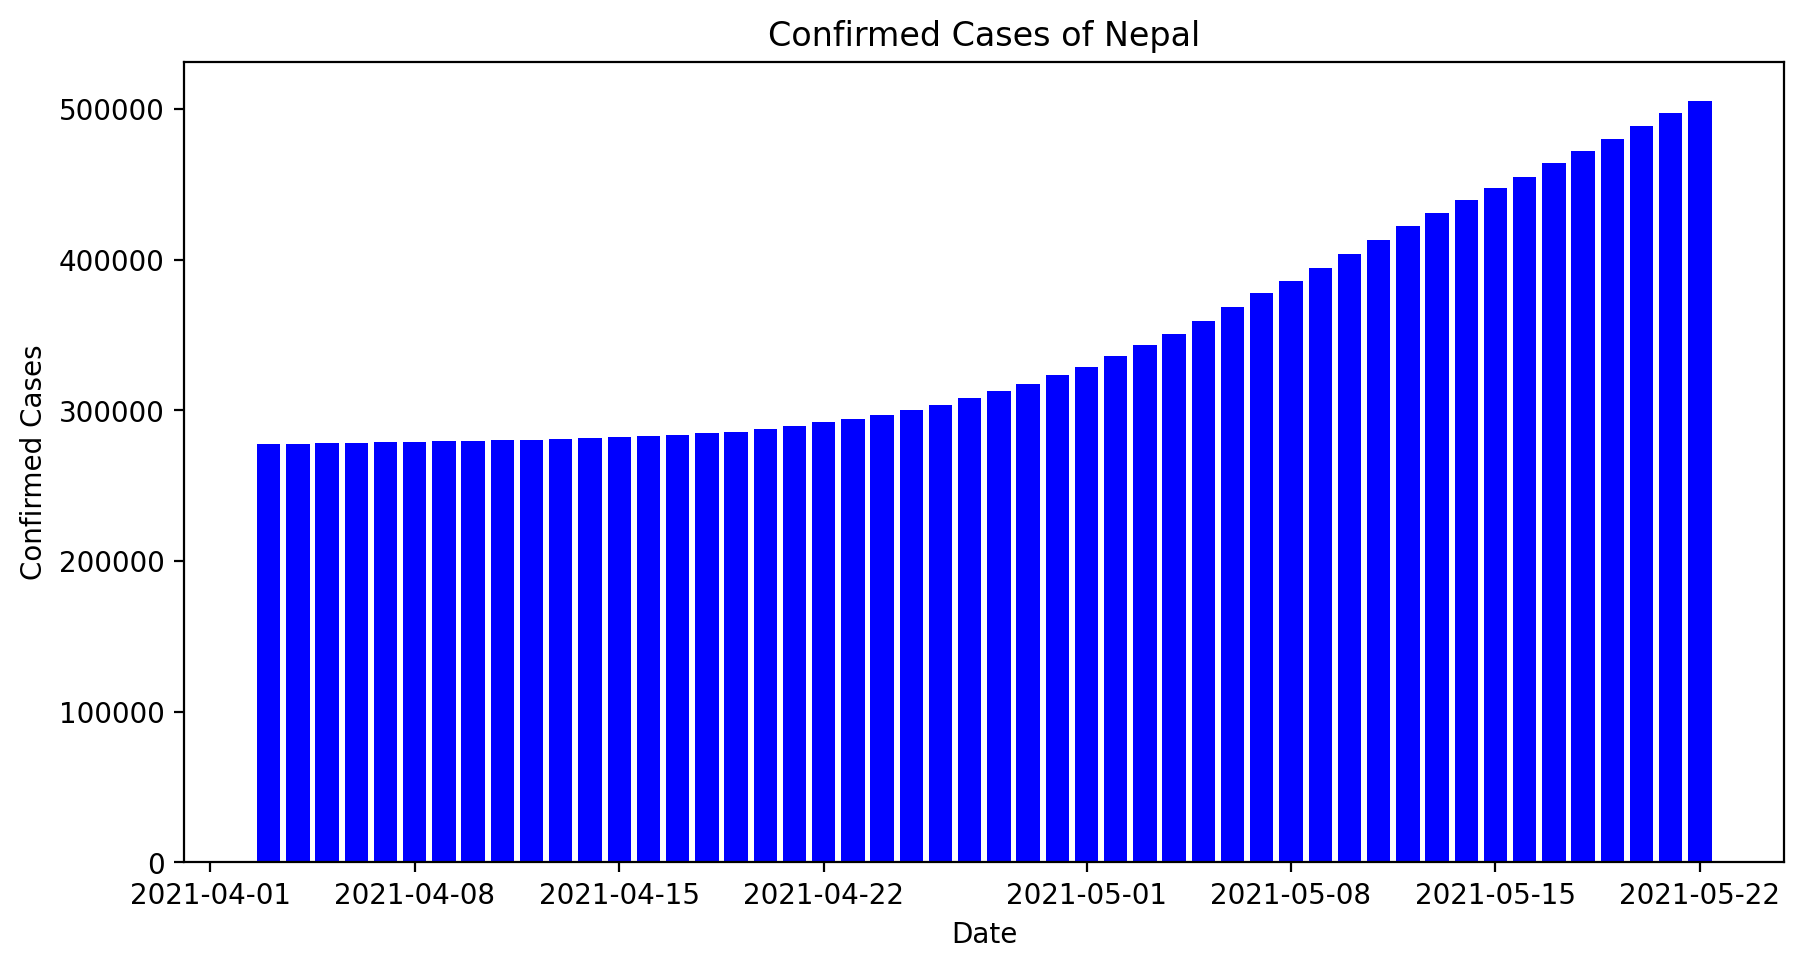

In [111]:
fig = plt.figure(figsize = (10,5),dpi=200)
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(TotaldataNepal_50Days['Date'],TotaldataNepal_50Days["Confirmed"],color = 'blue')
axes.set_xlabel("Date")
axes.set_ylabel("Confirmed Cases")
axes.set_title("Confirmed Cases of Nepal")
plt.show()

In [113]:
fig = px.bar(TotaldataNepal_50Days,x =TotaldataNepal_50Days['Date'],y = TotaldataNepal_50Days["Confirmed"],color = TotaldataNepal_50Days["Confirmed"], title = 'Confirmed Cases of Nepal' )
fig.show()

In [116]:
fig = px.bar(TotaldataNepal_50Days,x =TotaldataNepal_50Days['Date'],y = TotaldataNepal_50Days["Confirmed"],color = TotaldataNepal_50Days["Confirmed"], title = 'Confirmed Cases of Nepal' )
fig.show()

fig = px.bar(TotaldataIndia_50Days,x =TotaldataIndia_50Days['Date'],y = TotaldataIndia_50Days["Confirmed"],color = TotaldataIndia_50Days["Confirmed"], title = 'Confirmed Cases of India' )
fig.show()

fig = px.bar(TotaldataBhutan_50Days,x =TotaldataBhutan_50Days['Date'],y = TotaldataBhutan_50Days["Confirmed"],color = TotaldataBhutan_50Days["Confirmed"], title = 'Confirmed Cases of Bhutan' )
fig.show()

fig = px.bar(TotaldataPakistan_50Days,x =TotaldataPakistan_50Days['Date'],y = TotaldataPakistan_50Days["Confirmed"],color = TotaldataPakistan_50Days["Confirmed"], title = 'Confirmed Cases of Pakistan' )
fig.show()

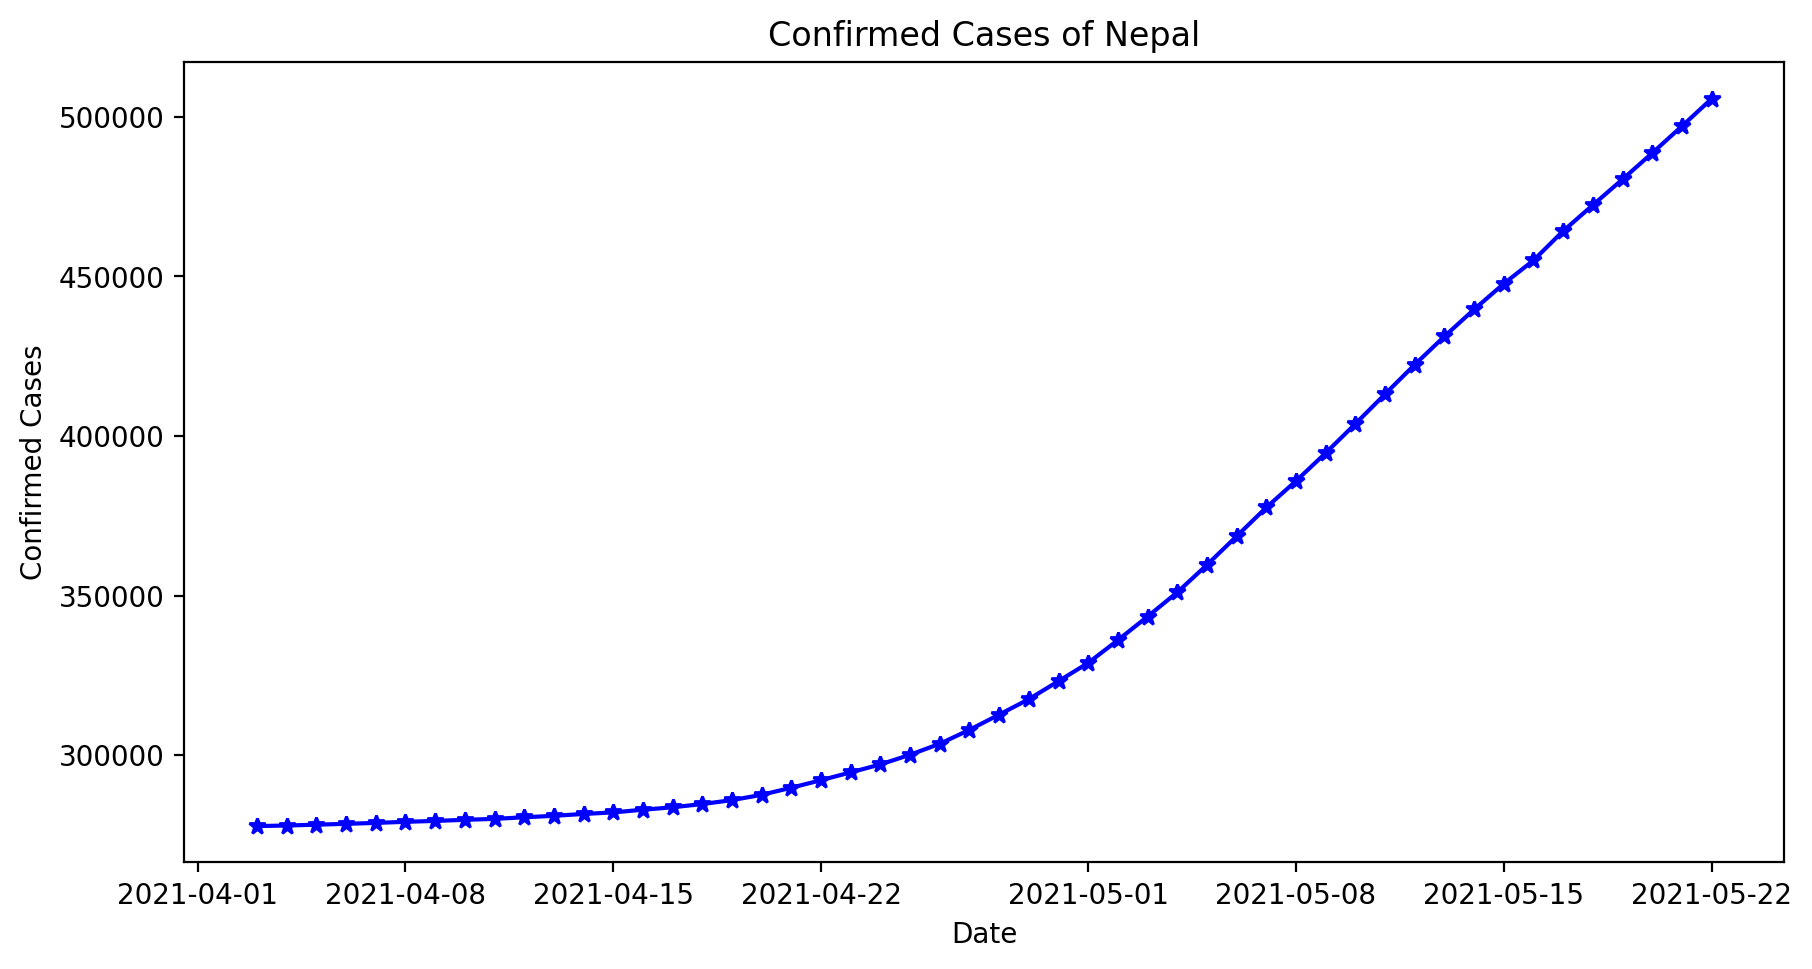

In [118]:
fig = plt.figure(figsize = (10,5),dpi=200)
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(TotaldataNepal_50Days['Date'],TotaldataNepal_50Days["Confirmed"],color = 'blue',marker="*")
axes.set_xlabel("Date")
axes.set_ylabel("Confirmed Cases")
axes.set_title("Confirmed Cases of Nepal")
plt.show()

In [119]:
fig = px.scatter(TotaldataNepal_50Days,x =TotaldataNepal_50Days['Date'],y = TotaldataNepal_50Days["Confirmed"],color = TotaldataNepal_50Days["Confirmed"], title = 'Confirmed Cases of Nepal' )
fig.show()

In [123]:
import cufflinks as cd
cd.go_offline()

TotaldataNepal_50Days.iplot(kind = 'scatter',x='Date',y='Confirmed',mode = 'lines+markers',title='Confirmed Cases in Nepal')

In [132]:
from plotly.subplots import make_subplots

fig = make_subplots(
        rows =2, cols =2, specs = [[{'secondary_y':True},{'secondary_y':True}],[{'secondary_y':True},{'secondary_y':True}]],
        subplot_titles = ('Nepal','India','Bhutan','Pakistan')
)

fig.add_trace(go.Bar(x=TotaldataNepal_50Days['Date'],y = TotaldataNepal_50Days["Confirmed"],
                        marker = dict(color = TotaldataNepal_50Days["Confirmed"],coloraxis='coloraxis')),1,1)
fig.add_trace(go.Bar(x=TotaldataIndia_50Days['Date'],y = TotaldataIndia_50Days["Confirmed"],
                        marker = dict(color = TotaldataIndia_50Days["Confirmed"],coloraxis='coloraxis')),1,2)
fig.add_trace(go.Bar(x=TotaldataBhutan_50Days['Date'],y = TotaldataBhutan_50Days["Confirmed"],
                        marker = dict(color = TotaldataBhutan_50Days["Confirmed"],coloraxis='coloraxis')),2,1)
fig.add_trace(go.Bar(x=TotaldataPakistan_50Days['Date'],y = TotaldataPakistan_50Days["Confirmed"],
                        marker = dict(color = TotaldataPakistan_50Days["Confirmed"],coloraxis='coloraxis')),2,2)


fig.update_layout(coloraxis = dict(colorscale = 'Bluered_r'),showlegend = False, title_text = "Total Confirmed Cases for 4 countries")
fig.show()

In [133]:
from plotly.subplots import make_subplots

fig = make_subplots(
        rows =2, cols =2, specs = [[{'secondary_y':True},{'secondary_y':True}],[{'secondary_y':True},{'secondary_y':True}]],
        subplot_titles = ('Nepal','India','Bhutan','Pakistan')
)

fig.add_trace(go.Scatter(x=TotaldataNepal_50Days['Date'],y = TotaldataNepal_50Days["Confirmed"],
                        marker = dict(color = TotaldataNepal_50Days["Confirmed"],coloraxis='coloraxis')),1,1)
fig.add_trace(go.Scatter(x=TotaldataIndia_50Days['Date'],y = TotaldataIndia_50Days["Confirmed"],
                        marker = dict(color = TotaldataIndia_50Days["Confirmed"],coloraxis='coloraxis')),1,2)
fig.add_trace(go.Scatter(x=TotaldataBhutan_50Days['Date'],y = TotaldataBhutan_50Days["Confirmed"],
                        marker = dict(color = TotaldataBhutan_50Days["Confirmed"],coloraxis='coloraxis')),2,1)
fig.add_trace(go.Scatter(x=TotaldataPakistan_50Days['Date'],y = TotaldataPakistan_50Days["Confirmed"],
                        marker = dict(color = TotaldataPakistan_50Days["Confirmed"],coloraxis='coloraxis')),2,2)


fig.update_layout(coloraxis = dict(colorscale = 'Bluered_r'),showlegend = False, title_text = "Total Confirmed Cases for 4 countries")
fig.show()

In [136]:
tranformeddata.query('Country=="India"')

Status,index,Date,Province,Country,Lat,Long,Confirmed,Dealth,Recovered
125,125,2020-01-22,N/A,India,20.593684,78.96288,0.0,0.0,0.0
404,404,2020-01-23,N/A,India,20.593684,78.96288,0.0,0.0,0.0
683,683,2020-01-24,N/A,India,20.593684,78.96288,0.0,0.0,0.0
962,962,2020-01-25,N/A,India,20.593684,78.96288,0.0,0.0,0.0
1241,1241,2020-01-26,N/A,India,20.593684,78.96288,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
134603,134603,2021-05-18,N/A,India,20.593684,78.96288,25496330.0,283248.0,21986363.0
134882,134882,2021-05-19,N/A,India,20.593684,78.96288,25772440.0,287122.0,22355440.0
135161,135161,2021-05-20,N/A,India,20.593684,78.96288,26031991.0,291331.0,22712735.0
135440,135440,2021-05-21,N/A,India,20.593684,78.96288,26289290.0,295525.0,23070365.0


In [141]:
Confirmed = tranformeddata.groupby("Date").sum()['Confirmed'].reset_index()
Death = tranformeddata.groupby("Date").sum()['Dealth'].reset_index()
Recovered = tranformeddata.groupby("Date").sum()['Recovered'].reset_index()

In [144]:
Recovered

,Date,Recovered
0,2020-01-22,30.0
1,2020-01-23,32.0
2,2020-01-24,39.0
3,2020-01-25,42.0
4,2020-01-26,56.0
...,...,...
482,2021-05-18,100552032.0
483,2021-05-19,101250059.0
484,2021-05-20,101886747.0
485,2021-05-21,102496978.0


In [149]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = Confirmed['Date'],y=Confirmed['Confirmed'],mode = 'lines+markers',name = 'Confirmed',line = dict(color = 'blue')))
fig.add_trace(go.Scatter(x = Death['Date'],y=Death['Dealth'],mode = 'lines+markers',name = 'Death',line = dict(color = 'Red')))
fig.add_trace(go.Scatter(x = Recovered['Date'],y=Recovered['Recovered'],mode = 'lines+markers',name = 'Recovered',line = dict(color = 'green')))
fig.update_layout(coloraxis = dict(colorscale = 'Bluered_r'),showlegend = True, title_text = "Worldwide Cases")
